# Jon Sweeney
## MIS505
The code in this file contains the solution to the portfolio milestone

### Goal: Discover if the enrollment in primary education increase with the improvement of per capita GDP in the past 20 years for Barbados

In [1]:
import pandas as pd  # data manipulation
import numpy as np  # data manipulation
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
import sqlite3  # sql database
from scipy.stats import zscore  # stats

## Part 1

Task: Using the United Nations on education and GDP datasets, create a dataset containing **Year**, **Primary Enrollment**, **GDP** for last 20 years. Save to CSV file and insert into a SQL database.

### Inspect Education Data

In [2]:
ed_df_raw = pd.read_csv('data/API_SE.PRM.ENRL_DS2_en_csv_v2_4538564.csv', skiprows=4)  # skip the first 4 rows of metadata
print(ed_df_raw.shape)  # get rows x cols
ed_df_raw.head()  # preview the data

(266, 67)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,9803.0,9816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,5986268.0,6217756.0,6199329.0,6265011.0,6350404.0,6544906.0,6777785.0,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5620915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ed_df_raw.tail()  # confirm no footer

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
261,Kosovo,XKX,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,3874741.0,NaN,NaN,3900134.0,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,7063849.0,7195183.0,7555842.0,7569924.0,7582154.0,7568387.0,7688381.0,NaN,NaN,NaN
264,Zambia,ZMB,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,3075161.0,3217872.0,3215723.0,3203220.0,3284841.0,NaN,NaN,NaN,NaN,NaN
265,Zimbabwe,ZWE,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,2663187.0,NaN,2658415.0,2662010.0,2676485.0,2725970.0,2789692.0,2869735.0,NaN,NaN


In [4]:
last_20_range = list(range(46,66))  # years 2002-2021
ed_last_20_df = ed_df_raw.iloc[:, list(range(0,4)) + last_20_range]  # get country info and data for years 
ed_last_20_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Primary education, pupils",SE.PRM.ENRL,9840.0,9897.0,10185.0,10250.0,10390.0,10346.0,...,8888.0,9803.0,9816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Primary education, pupils",SE.PRM.ENRL,2667629.0,3781015.0,4430142.0,4318819.0,4669110.0,4718077.0,...,5767543.0,5986268.0,6217756.0,6199329.0,6265011.0,6350404.0,6544906.0,6777785.0,NaN,NaN
3,Africa Western and Central,AFW,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,3558605.0,...,NaN,NaN,NaN,5620915.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ed_last_20_df[~ed_last_20_df['2021'].isna()]  # get countries with 2021 data

,Country Name,Country Code,Indicator Name,Indicator Code,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
16,Burundi,BDI,"Primary education, pupils",SE.PRM.ENRL,817171.0,894859.0,968488.0,1036859.0,1324937.0,1490844.0,...,1980846.0,2009800.0,2046794.0,2072408.0,2110429.0,2126173.0,2170884.0,2212532.0,NaN,2302280.0
33,Botswana,BWA,"Primary education, pupils",SE.PRM.ENRL,330835.0,330376.0,328692.0,329191.0,330417.0,327617.0,...,335830.0,340065.0,340700.0,344618.0,NaN,NaN,NaN,NaN,NaN,365288.0
56,Djibouti,DJI,"Primary education, pupils",SE.PRM.ENRL,44321.0,46364.0,48713.0,50651.0,53745.0,56667.0,...,63612.0,63368.0,64319.0,62940.0,61755.0,61846.0,62979.0,68701.0,69134.0,70324.0
149,Monaco,MCO,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,1831.0,NaN,NaN,NaN,...,1766.0,1753.0,1752.0,1959.0,2001.0,2018.0,2018.0,1989.0,1971.0,1932.0
167,Mauritius,MUS,"Primary education, pupils",SE.PRM.ENRL,132432.0,129616.0,126226.0,123562.0,121387.0,119310.0,...,113634.0,109097.0,105447.0,101633.0,97300.0,92989.0,89642.0,85730.0,NaN,82514.0
211,El Salvador,SLV,"Primary education, pupils",SE.PRM.ENRL,987676.0,1016098.0,1045485.0,1045484.0,1035100.0,1075041.0,...,858864.0,817275.0,777043.0,741394.0,711182.0,678137.0,662740.0,626300.0,616870.0,603304.0


There ere are only 6 countries with data for 2021. Changing year span to \[2001-2020] to allow for more country options

In [6]:
last_20_range = list(range(45,65))
ed_last_20_df = ed_df_raw.iloc[:, list(range(0,4)) + last_20_range]  # get country info and data for years 2001-2020
ed_last_20_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Primary education, pupils",SE.PRM.ENRL,9436.0,9840.0,9897.0,10185.0,10250.0,10390.0,...,9112.0,8888.0,9803.0,9816.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Primary education, pupils",SE.PRM.ENRL,773623.0,2667629.0,3781015.0,4430142.0,4318819.0,4669110.0,...,5291624.0,5767543.0,5986268.0,6217756.0,6199329.0,6265011.0,6350404.0,6544906.0,6777785.0,NaN
3,Africa Western and Central,AFW,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Primary education, pupils",SE.PRM.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,5026803.0,NaN,NaN,NaN,5620915.0,NaN,NaN,NaN,NaN,NaN


In [7]:
ed_last_20_df.info()  # describe the data types and look at null value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   2001            217 non-null    float64
 5   2002            221 non-null    float64
 6   2003            214 non-null    float64
 7   2004            220 non-null    float64
 8   2005            224 non-null    float64
 9   2006            214 non-null    float64
 10  2007            225 non-null    float64
 11  2008            223 non-null    float64
 12  2009            223 non-null    float64
 13  2010            215 non-null    float64
 14  2011            220 non-null    float64
 15  2012            221 non-null    float64
 16  2013            208 non-null    float64
 17  2014            215 non-null    flo

### Inspect GDP Data

In [8]:
gdp_df_raw = pd.read_csv('data/WDIData.csv')  # read GDP data
gdp_df_raw.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.936004,17.337896,17.687093,18.140971,18.491344,18.825520,19.272212,19.628009,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.499471,6.680066,6.859110,7.016238,7.180364,7.322294,7.517191,7.651598,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.855399,38.046781,38.326255,38.468426,38.670044,38.722783,38.927016,39.042839,NaN,NaN


In [9]:
gdp_last_20_df = gdp_df_raw.iloc[:, list(range(0,4)) + last_20_range]  # get the first few cols and years 2001-2020
gdp_last_20_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,11.805706,12.167502,12.533893,12.916778,13.351035,13.865804,...,16.128485,16.559819,16.936004,17.337896,17.687093,18.140971,18.491344,18.825520,19.272212,19.628009
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,3.692771,3.846867,4.071761,4.314265,4.537563,4.826155,...,6.058950,6.281667,6.499471,6.680066,6.859110,7.016238,7.180364,7.322294,7.517191,7.651598
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,32.698002,33.145282,33.676838,34.198090,34.721609,35.199741,...,37.329561,37.601816,37.855399,38.046781,38.326255,38.468426,38.670044,38.722783,38.927016,39.042839
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,19.900569,21.525812,22.474309,23.781918,23.487415,24.763538,...,29.089827,31.844384,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,9.697171,10.919163,10.385696,12.423710,...,16.222794,19.402592,18.663502,17.633986,16.464681,24.531436,25.345111,27.449908,29.641760,30.404935


In [10]:
gdp_last_20_df[gdp_last_20_df['Indicator Name'].str.contains('GDP per capita')]  # view the indicators for GDP per capita

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
471,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1287.215780,1303.193692,1308.920667,1345.423308,1390.645361,1443.043967,...,1540.966422,1513.369728,1534.557675,1552.987031,1556.316469,1548.813076,1546.795571,1544.077975,1534.890147,1452.730251
472,Africa Eastern and Southern,AFE,GDP per capita (constant LCU),NY.GDP.PCAP.KN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,Africa Eastern and Southern,AFE,GDP per capita (current LCU),NY.GDP.PCAP.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,633.548479,631.810182,819.665920,993.668106,1129.701204,1236.994113,...,1810.229164,1777.303950,1748.905594,1736.242220,1556.316469,1446.533624,1629.404273,1541.031661,1511.309259,1360.878645
475,Africa Eastern and Southern,AFE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,1.017492,1.241277,0.439457,2.788759,3.361177,3.767934,...,0.899457,-1.790869,1.400051,1.200956,0.214389,-0.482125,-0.130261,-0.175692,-0.595037,-5.352819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382606,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2800.952116,2545.348182,2107.840306,1979.200783,1857.392042,1781.474597,...,2039.367980,2339.177047,2343.679343,2357.651166,2360.022385,2341.304920,2416.049969,2497.136618,2310.634802,2134.555461
382607,Zimbabwe,ZWE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2346.198150,2165.322628,1828.524860,1763.021151,1706.399800,1687.154196,...,2101.824051,2375.927006,2560.773267,2612.455954,2679.507615,2806.469032,2416.049969,2556.793484,2408.154197,2251.455674
382644,Zimbabwe,ZWE,"Government expenditure per student, primary (%...",SE.XPD.PRIM.PC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.012050,14.000090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382645,Zimbabwe,ZWE,"Government expenditure per student, secondary ...",SE.XPD.SECO.PC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.164750,22.244280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
currency_unit = 'NY.GDP.PCAP.KD'  # Using a constant value to account for inflation and US dollar for familiarity with target audience
gdp_last_20_df = gdp_last_20_df[gdp_last_20_df['Indicator Code'] == currency_unit]  # selecting constant US dollar as unit
gdp_last_20_df.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
471,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1287.215780,1303.193692,1308.920667,1345.423308,1390.645361,1443.043967,...,1540.966422,1513.369728,1534.557675,1552.987031,1556.316469,1548.813076,1546.795571,1544.077975,1534.890147,1452.730251
1913,Africa Western and Central,AFW,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1222.531495,1308.239506,1344.062172,1413.277989,1455.940851,1492.829151,...,1739.005221,1779.266786,1837.285808,1894.182678,1894.322115,1846.332887,1839.113395,1843.554695,1852.861728,1788.647157


In [12]:
gdp_last_20_df.info()  # describe null value count and datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 471 to 382601
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   2001            242 non-null    float64
 5   2002            247 non-null    float64
 6   2003            247 non-null    float64
 7   2004            248 non-null    float64
 8   2005            248 non-null    float64
 9   2006            249 non-null    float64
 10  2007            249 non-null    float64
 11  2008            251 non-null    float64
 12  2009            252 non-null    float64
 13  2010            252 non-null    float64
 14  2011            253 non-null    float64
 15  2012            252 non-null    float64
 16  2013            254 non-null    float64
 17  2014            254 non-null    flo

In [13]:
countries_to_check_for = ['Barbados', 'Ireland', 'Germany', 'Norway', 'Brazil', 'Spain', 'Sweden', 'Switzerland', 'Greenland', 'Mexico', 'Jamaica']  # countries I am interested in analyzing
countries_gdp_inc_srs = gdp_last_20_df[(gdp_last_20_df['2020'].notna()) & (gdp_last_20_df['2020'] > gdp_last_20_df['2001'])]['Country Name']  # Has 2020 gdp data & gdp increased in last 20
countries_gdp_inc_srs[countries_gdp_inc_srs.isin(countries_to_check_for)]  # check if countries had an increase in GDP

108621         Brazil
176395        Germany
182163      Greenland
205235        Ireland
254263         Mexico
283103         Norway
329247          Spain
340783         Sweden
342225    Switzerland
Name: Country Name, dtype: object

In [14]:
countries_with_2020_ed_data_srs = ed_last_20_df[ed_last_20_df['2020'].notna()]['Country Name']  # has 2020 ed data
countries_with_2020_ed_data_srs[countries_with_2020_ed_data_srs.isin(countries_to_check_for)]

30     Barbados
117     Jamaica
Name: Country Name, dtype: object

Only 2 countries with education data and has null 2020 GDP data

In [15]:
last_20_range = list(range(44,64))  # change to 2000-2019 to capture more data at start and stop GDP and ED data
columns_indexes = list(range(0,4)) + last_20_range  # all columns to capture
ed_last_20_df = ed_df_raw.iloc[:, columns_indexes]  # filtered ed data
gdp_last_20_df = gdp_df_raw.iloc[:, columns_indexes]  # filtered gdp data

countries_with_2019_ed_data_srs = ed_last_20_df[ed_last_20_df['2019'].notna()]['Country Name']  # countries with 2019 ed data
countries_gdp_inc_srs = gdp_last_20_df[(gdp_last_20_df['2019'].notna()) & (gdp_last_20_df['2019'] > gdp_last_20_df['2000'])]['Country Name']  # countries where gdp increased as a series
viable_countries = np.array(countries_gdp_inc_srs[countries_gdp_inc_srs.isin(countries_with_2019_ed_data_srs.tolist())].unique())  # get list of countries that 1. gdp increased 2. has 2019 data - get unique names

for country in viable_countries:  # loop through countries
    if country in countries_to_check_for:  # if the country is in the list of countries I'm interested in analyzing, print the name
        print(country)

Barbados
Brazil
Germany
Ireland
Jamaica
Mexico
Norway
Spain
Sweden
Switzerland


Choosing Ireland from the list

### Filter Ireland's Education Data and GDP Data

In [16]:
irl_ed_df = ed_last_20_df[ed_last_20_df['Country Code'] == 'IRL']  # filter ed data down to Ireland
print(f'{irl_ed_df.isna().sum().sum()} NaN values')  # get count of NaN values in education data
irl_ed_df.head()

0 NaN values


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
111,Ireland,IRL,"Primary education, pupils",SE.PRM.ENRL,449638.0,443617.0,445947.0,447618.0,450413.0,454060.0,...,506400.0,511466.0,518223.0,527768.0,536471.0,544856.0,553585.0,559151.0,564304.0,568495.0


In [17]:
irl_gdp_df = gdp_last_20_df[(gdp_last_20_df['Country Code'] == 'IRL') & (gdp_last_20_df['Indicator Code'] == currency_unit)]    # filter gdp data down to Ireland and data in target currency units
print(f'{irl_gdp_df.isna().sum().sum()} NaN values')  # get count of NaN values in GDP per capita 
irl_gdp_df

0 NaN values


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
205235,Ireland,IRL,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,41623.057508,43138.617124,44918.807349,45523.055819,47731.484641,49381.775575,...,45932.013743,46220.81322,46001.273287,46339.469298,50010.434208,62012.484926,62568.626596,67424.228559,72607.631854,75143.018471


Confirmed GDP in 2019 > 2000

Check for Outliers

In [18]:
ed_z_scores = irl_ed_df.iloc[:, 4:].apply(zscore, nan_policy='omit', axis=1)  # get ed data z-scores and ignore any null values
outliers = (ed_z_scores > 3) | (ed_z_scores < -3)  # check if > 3 std devs away 
print(f'There are {outliers.sum().sum()} education outliers')  

There are 0 education outliers


In [19]:
gdp_z_scores = irl_gdp_df.iloc[:, 4:].apply(zscore, nan_policy='omit', axis=1)  # get gdp data z-scores and ignore any null values
outliers = (gdp_z_scores > 3) | (gdp_z_scores < -3)  # check if > 3 std devs away
print(f'There are {outliers.sum().sum()} gdp outliers')

There are 0 gdp outliers


Join Data

In [20]:
irl_ed_T_df = irl_ed_df.iloc[:, 4:].T  # filter the ed data to target columns and transpose df 
irl_gdp_T_df = irl_gdp_df.iloc[:, 4:].T  # filter the gdp data to target columns and transpose df 

In [21]:
irl_gdp_T_df.head()  # preview to verify correct format

,205235
2000,41623.057508
2001,43138.617124
2002,44918.807349
2003,45523.055819
2004,47731.484641


In [22]:
irl_df = pd.merge(irl_ed_T_df, irl_gdp_T_df, left_index=True, right_index=True)  # join using the index (year)
irl_df.rename(columns={111: 'Primary Enrollment', 205235: 'GDP'}, inplace=True)  # rename columns
irl_df.head() 

,Primary Enrollment,GDP
2000,449638.0,41623.057508
2001,443617.0,43138.617124
2002,445947.0,44918.807349
2003,447618.0,45523.055819
2004,450413.0,47731.484641


In [23]:
irl_df.reset_index(inplace=True)  # reset the index and move the year to a col
irl_df.rename(columns={'index': 'Year'}, inplace=True)  # rename the col to Year
irl_df.head()

,Year,Primary Enrollment,GDP
0,2000,449638.0,41623.057508
1,2001,443617.0,43138.617124
2,2002,445947.0,44918.807349
3,2003,447618.0,45523.055819
4,2004,450413.0,47731.484641


### Final Format

In [24]:
irl_df  # display the data to verify it matches project requirements 

,Year,Primary Enrollment,GDP
0,2000,449638.0,41623.057508
1,2001,443617.0,43138.617124
2,2002,445947.0,44918.807349
3,2003,447618.0,45523.055819
4,2004,450413.0,47731.484641
5,2005,454060.0,49381.775575
6,2006,461588.0,50462.265344
7,2007,475836.0,51625.276075
8,2008,486921.0,48313.967054
9,2009,498838.0,45386.405155


Note: I chose to select 2019 as the last year because I wanted to analyze the trend over 20 years. If 2020 was used for Ireland, the GDP data would have been null and 

only 19 years would have been truly analyzed unless filling 2020 with 2019's data.

### Analysis

In [25]:
corr = irl_df['Primary Enrollment'].corr(irl_df['GDP'])  # get correlation coefficient [0-1] to see how strong of a correlation
print("Correlation coefficient:", round(corr,2))

Correlation coefficient: 0.77


A correlation coefficient of 0.77 suggests a strong correlation between GDP per capita and primary education enrollment.

### Visualize Data

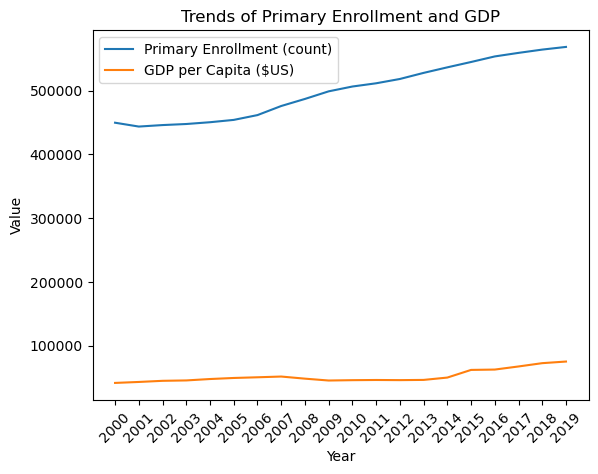

In [26]:
sns.lineplot(x='Year', y='Primary Enrollment', data=irl_df, label='Primary Enrollment (count)')  # primary enrollment line graph
sns.lineplot(x='Year', y='GDP', data=irl_df, label='GDP per Capita ($US)')  # gdp line graph

plt.title('Trends of Primary Enrollment and GDP')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()  # show legend
plt.show()

The line plot is not the best at showing the deltas of the features over time. The graph is misleading that there were only minimal changes in US$ and enrollment numbers.

Will attempt a regression plot to improve showing the positive relationship between the two

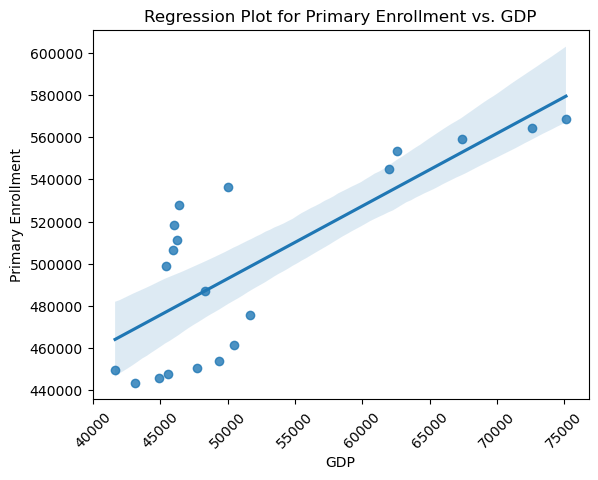

In [27]:
sns.regplot(x='GDP', y='Primary Enrollment', data=irl_df)  # create a reg plot to visualize trend
plt.title('Regression Plot for Primary Enrollment vs. GDP')  # title
plt.xticks(rotation=45)  # rotate x-ticks for readability
plt.show()  # display

### Export Data 

###### CSV File

In [28]:
irl_df.to_csv('output_files/irl_ed_prim_enrollment.csv', index=False)  # export data to CSV file 

###### SQLite Database

In [29]:
conn = sqlite3.connect('output_files/irl_ed_prim_enrollment.db')  # create a connection to sqlite db
irl_df.to_sql('IRL_ED_GDP', conn, if_exists='replace', index=False)  # save to table name, use connection, replace if exists, and no index
conn.close()  # close connection